### Подготовка датасета для предсказаний болезней сердца

In [79]:
import pandas as pd
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

* age — возраст
* sex — пол (1 - мужчина, 0 - женщина)
* cp — тип боли в груди (4 значения)
* trestbps — артериальное давление в покое
* chol — холестерин сыворотки в мг/дл
* fbs — уровень сахара в крови натощак > 120 мг/дл
* restecg — результаты электрокардиографии в покое (значения 0,1,2)
* thalach — достигнута максимальная частота сердечных сокращений
* exang — стенокардия, вызванная физической нагрузкой
* oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
* slope — наклон пикового сегмента ST при нагрузке
* ca — количество крупных сосудов (0-3), окрашенных при флюроскопии
* thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект

In [59]:
heart_data = pd.read_csv('../data/heart.csv')
heart_data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [60]:
heart_data['old'] = heart_data['age'].apply(lambda x: 1 if x > 60 else 0)

In [61]:
import numpy as np

age_intervals = pd.cut(heart_data.age, bins=[0, 20, 30, 40, 50, 60, np.inf])

trestbps_man = {0: 123, 1: 126, 2:129, 3:135, 4:142, 5:142}
trestbps_woman = {0: 116, 1: 120, 2:127, 3:137, 4:144, 5:169}

heart_data['trestbps_mean'] = 0
heart_data.loc[heart_data.sex == 1, 'trestbps_mean'] = age_intervals.cat.codes.astype(int).replace(trestbps_man)
heart_data.loc[heart_data.sex == 0, 'trestbps_mean'] = age_intervals.cat.codes.astype(int).replace(trestbps_woman)

In [8]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,0.260726,142.792079
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.439757,10.214569
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,137.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,0.000000,142.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000,142.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000,169.000000


Категориальные признаки: sex, cp, fbs, restecg, exang, slope, ca, thal, target

Имеют более 2-х значений, не являются порядковыми, значит, нуждаются в доп.кодировании: cp, restecg, slope, ca, thal

In [62]:
encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart_data[['cp', 'restecg', 'slope', 'ca', 'thal']])
heart_data = pd.concat([heart_data, type_bin], axis=1)

In [73]:
heart_data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,1,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,1,0,0,0,0,0,1,0,0


In [72]:
import plotly.express as px

fig = px.imshow(
    heart_data.corr(),
    text_auto=True,
    aspect="auto",
    title='Корреляция признаков'
)
# fig.show("png")
fig.show()

Числовые признаки: age, trestbps, chol, thalach, oldpeak, trestbps_mean

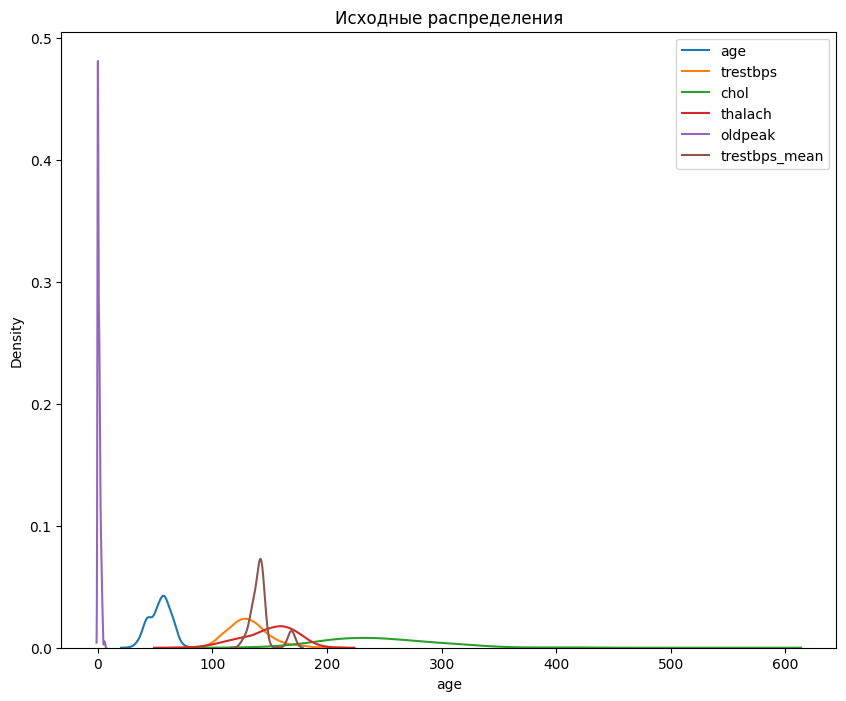

In [78]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(heart_data['age'], ax=ax1, label ='age')
sns.kdeplot(heart_data['trestbps'], ax=ax1, label ='trestbps')
sns.kdeplot(heart_data['chol'], ax=ax1, label ='chol')
sns.kdeplot(heart_data['thalach'], ax=ax1, label ='thalach')
sns.kdeplot(heart_data['oldpeak'], ax=ax1, label ='oldpeak')
sns.kdeplot(heart_data['trestbps_mean'], ax=ax1, label ='trestbps_mean')
plt.legend();

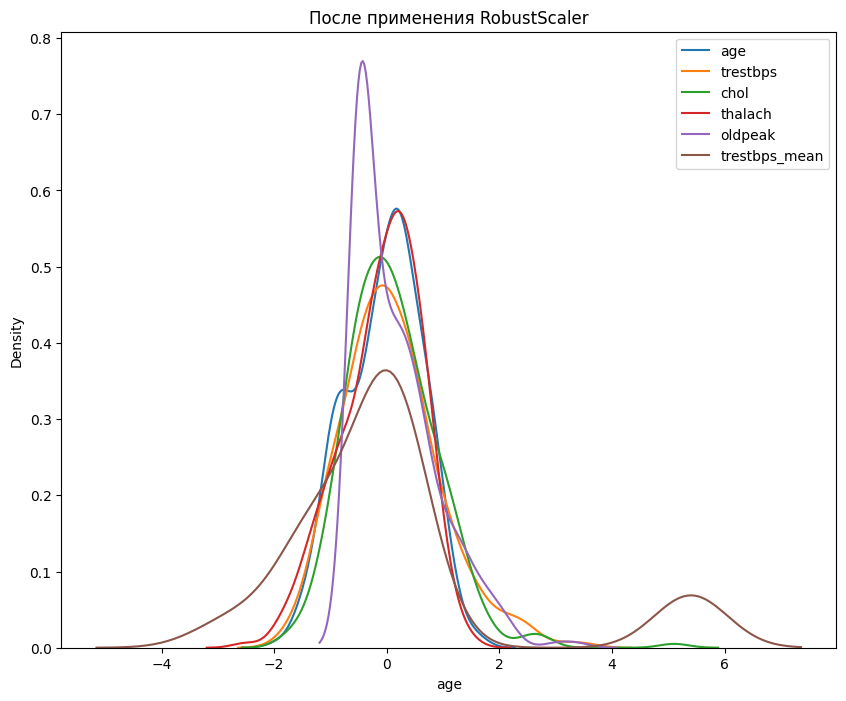

In [87]:
# данные не были очищены от выбросов, поэтому RobustScaler

# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(heart_data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'trestbps_mean']])

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'trestbps_mean'])

# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После применения RobustScaler')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df_r['age'], ax=ax1, label ='age')
sns.kdeplot(df_r['trestbps'], ax=ax1, label ='trestbps')
sns.kdeplot(df_r['chol'], ax=ax1, label ='chol')
sns.kdeplot(df_r['thalach'], ax=ax1, label ='thalach')
sns.kdeplot(df_r['oldpeak'], ax=ax1, label ='oldpeak')
sns.kdeplot(df_r['trestbps_mean'], ax=ax1, label ='trestbps_mean')
plt.legend();

In [88]:
df_r.describe()

,age,trestbps,chol,thalach,oldpeak,trestbps_mean
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-0.046938,0.081188,0.098646,-0.103173,0.149752,0.158416
std,0.672748,0.876907,0.816232,0.704774,0.725672,2.042914
min,-1.925926,-1.800000,-1.795276,-2.523077,-0.500000,-3.200000
25%,-0.555556,-0.500000,-0.456693,-0.600000,-0.500000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.444444,0.500000,0.543307,0.400000,0.500000,0.000000
max,1.629630,3.500000,5.102362,1.507692,3.375000,5.400000
